<a href="https://colab.research.google.com/github/ytg000629/ai4dl/blob/main/week3/chapter03_introduction-to-keras-and-tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-1.1712719 ]
 [-0.51003486]
 [-1.1987573 ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.36428154]
 [0.4921106 ]
 [0.23706341]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
x

array([[0., 1.],
       [1., 1.]])

In [9]:
x = tf.ones(shape=(2,2))
#x[0,0] = 0. 이거 하면 오류남
#numpy와 tensor의 차이점은 tensor는 위와 같은 방식으로 할당이 안됨.    

**Creating a TensorFlow variable**

tf.Variable(value, name, dtype, shape)

In [14]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.02091861],
       [ 0.9111262 ],
       [-1.8365638 ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [15]:
tf.ones((3, 1))

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [17]:
v.assign(tf.ones((3, 1)))
#assign : 변수의 값을 변경

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [18]:
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [19]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [20]:
v.assign_add(tf.ones((3, 1)))
#assign_add() : 덧셈 연산을 수행한 후의 결과로 변수의 값 업데이트
#assign_sub() : 뺄셈 연산을 수행한 후의 결과로 변수의 값 업데이트

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [24]:
a = tf.ones((2, 2))
b = tf.square(a) #제곱
c = tf.sqrt(a)   #루트  
d = b + c
e = tf.matmul(a, b) #matmul : 행렬 곱   
e *= d

In [25]:
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [37]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [38]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=9.0>

In [39]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**Using `GradientTape` with constant tensor inputs**

https://rfriend.tistory.com/m/556

오차역전파할 때 gradient tapes가 필요한 이유

tensorflow 2.x 버전의 특징 : 즉시 실행모드. 계산 하면 결과값만 출력.

미분하려면 필요한 함수와 계산 식의 연산 과정과 입력값에 대한 정보가 필요한데 즉시실행 모드에서는 그냥 결과만 띡 하고 나옴.

중간 연산관정(함수, 연산)을 tape에 기록해줌

In [34]:
input_const = tf.constant(3.)   #상수 생성
with tf.GradientTape() as tape:
   tape.watch(input_const)      #훈련가능한 variable만 디폴트로 추적가능(?). 상수는 tape.watch로 수동으로 불러와줘야함  
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [35]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [36]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=9.0>

**Using nested gradient tapes to compute second-order gradients**

In [30]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [40]:
speed

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [41]:
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [42]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],  #(0,3)
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],  #(3,0)
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [45]:
negative_samples.shape

(1000, 2)

In [46]:
negative_samples

array([[ 1.47807882,  4.23879263],
       [-0.55998824,  4.39295384],
       [-1.16543701,  3.09843087],
       ...,
       [-0.73791744,  0.46321483],
       [ 1.52901849,  2.03727591],
       [-0.08929171,  3.66319363]])

**Stacking the two classes into an array with shape (2000, 2)**

In [47]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
#배열을 세로로 결합

In [49]:
inputs.shape

(2000, 2)

**Generating the corresponding targets (0 and 1)**

In [50]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [52]:
targets.shape

(2000, 1)

**Plotting the two point classes**

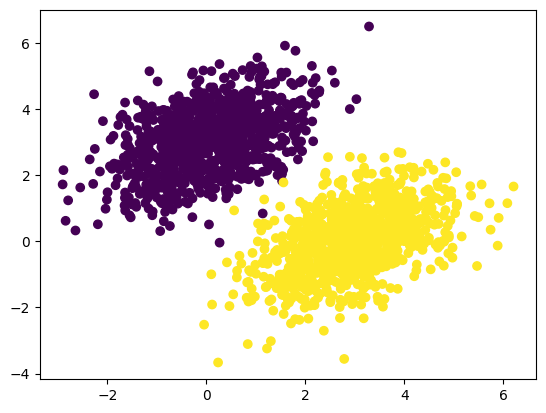

In [53]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()
#0 : negative sample 보라
#1 : positive sample 노랑   

**Creating the linear classifier variables**

In [54]:
input_dim = 2
output_dim = 1  #0 or 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim))) #(2,1)
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))                    #(1,)

**The forward pass function**

In [55]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [56]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)   #편차 제곱
    return tf.reduce_mean(per_sample_losses)               #편차 제곱의 평균    

**The training step function**

In [57]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [58]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.8380
Loss at step 1: 0.7988
Loss at step 2: 0.2357
Loss at step 3: 0.1497
Loss at step 4: 0.1303
Loss at step 5: 0.1207
Loss at step 6: 0.1130
Loss at step 7: 0.1061
Loss at step 8: 0.0997
Loss at step 9: 0.0938
Loss at step 10: 0.0884
Loss at step 11: 0.0835
Loss at step 12: 0.0789
Loss at step 13: 0.0747
Loss at step 14: 0.0708
Loss at step 15: 0.0673
Loss at step 16: 0.0640
Loss at step 17: 0.0610
Loss at step 18: 0.0582
Loss at step 19: 0.0556
Loss at step 20: 0.0533
Loss at step 21: 0.0511
Loss at step 22: 0.0491
Loss at step 23: 0.0473
Loss at step 24: 0.0456
Loss at step 25: 0.0440
Loss at step 26: 0.0426
Loss at step 27: 0.0413
Loss at step 28: 0.0401
Loss at step 29: 0.0389
Loss at step 30: 0.0379
Loss at step 31: 0.0370
Loss at step 32: 0.0361
Loss at step 33: 0.0353
Loss at step 34: 0.0346
Loss at step 35: 0.0339
Loss at step 36: 0.0332
Loss at step 37: 0.0327
Loss at step 38: 0.0321
Loss at step 39: 0.0317


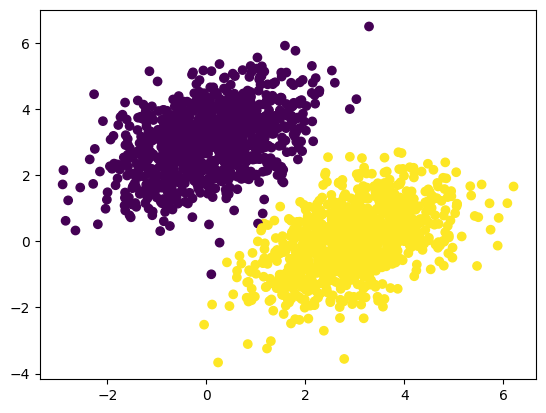

In [59]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

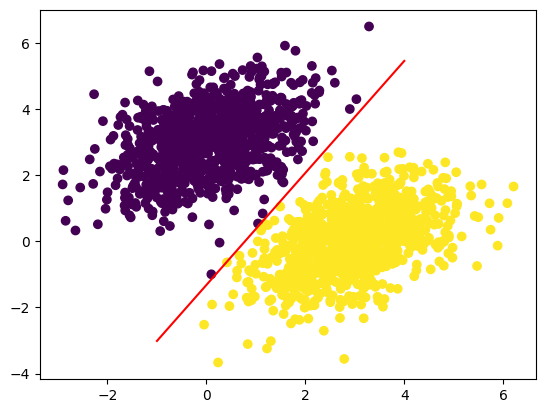

In [62]:
x = np.linspace(-1, 4, 100)  #-1과 4 사이의 100개의 숫자
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
# w1*x + w2*y + b = 0.5
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [65]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units            #layer의 크기 
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]   #784
        self.W = self.add_weight(shape=(input_dim, self.units),  #(784,32)
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),            #(32,)
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [66]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [67]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [68]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [69]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [71]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [72]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [73]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 4.2622 - binary_accuracy: 0.9495
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 4.0241 - binary_accuracy: 0.9485
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 3.8250 - binary_accuracy: 0.9480
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 3.6346 - binary_accuracy: 0.9470
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 3.4504 - binary_accuracy: 0.9455


In [74]:
history.history

{'loss': [4.262160301208496,
  4.024114608764648,
  3.825021505355835,
  3.6346018314361572,
  3.4504480361938477],
 'binary_accuracy': [0.9495000243186951,
  0.9484999775886536,
  0.9480000138282776,
  0.9470000267028809,
  0.9455000162124634]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [75]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples] 
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]  #7:3
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.6729 - binary_accuracy: 0.8479 - val_loss: 0.1408 - val_binary_accuracy: 0.9383
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0788 - binary_accuracy: 0.9493 - val_loss: 0.0319 - val_binary_accuracy: 0.9983
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0728 - binary_accuracy: 0.9543 - val_loss: 0.0510 - val_binary_accuracy: 0.9967
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0729 - binary_accuracy: 0.9557 - val_loss: 0.0471 - val_binary_accuracy: 0.9917
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0713 - binary_accuracy: 0.9607 - val_loss: 0.2615 - val_binary_accuracy: 0.7617


### Inference: Using a model after training

In [76]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 2ms/step
[[ 0.9140589 ]
 [-0.18543923]
 [ 0.06759101]
 [-0.29008424]
 [ 0.7332572 ]
 [ 0.30854467]
 [-0.24215358]
 [ 0.48377037]
 [-0.08291107]
 [-0.3107468 ]]


## Summary